In [24]:
import pandas as pd
import datetime
import numpy as np
from windrose import WindroseAxes


In [2]:
f = '../data/u_v_w.csv'
uvw = pd.read_csv(f,index_col=0,parse_dates=True)
uvw

,u,v,w
fecha,,,
2022-03-12 15:00:23,-0.38,-0.28,0.16
2022-03-12 15:00:24,-0.41,-0.30,0.10
2022-03-12 15:00:25,-0.43,-0.26,0.13
2022-03-12 15:00:26,-0.39,-0.15,0.14
2022-03-12 15:00:27,-0.32,-0.01,0.14
...,...,...,...
2022-03-12 15:41:34,-0.51,-1.50,0.21
2022-03-12 15:41:35,-0.41,-1.59,0.19
2022-03-12 15:41:36,-0.35,-1.71,0.24


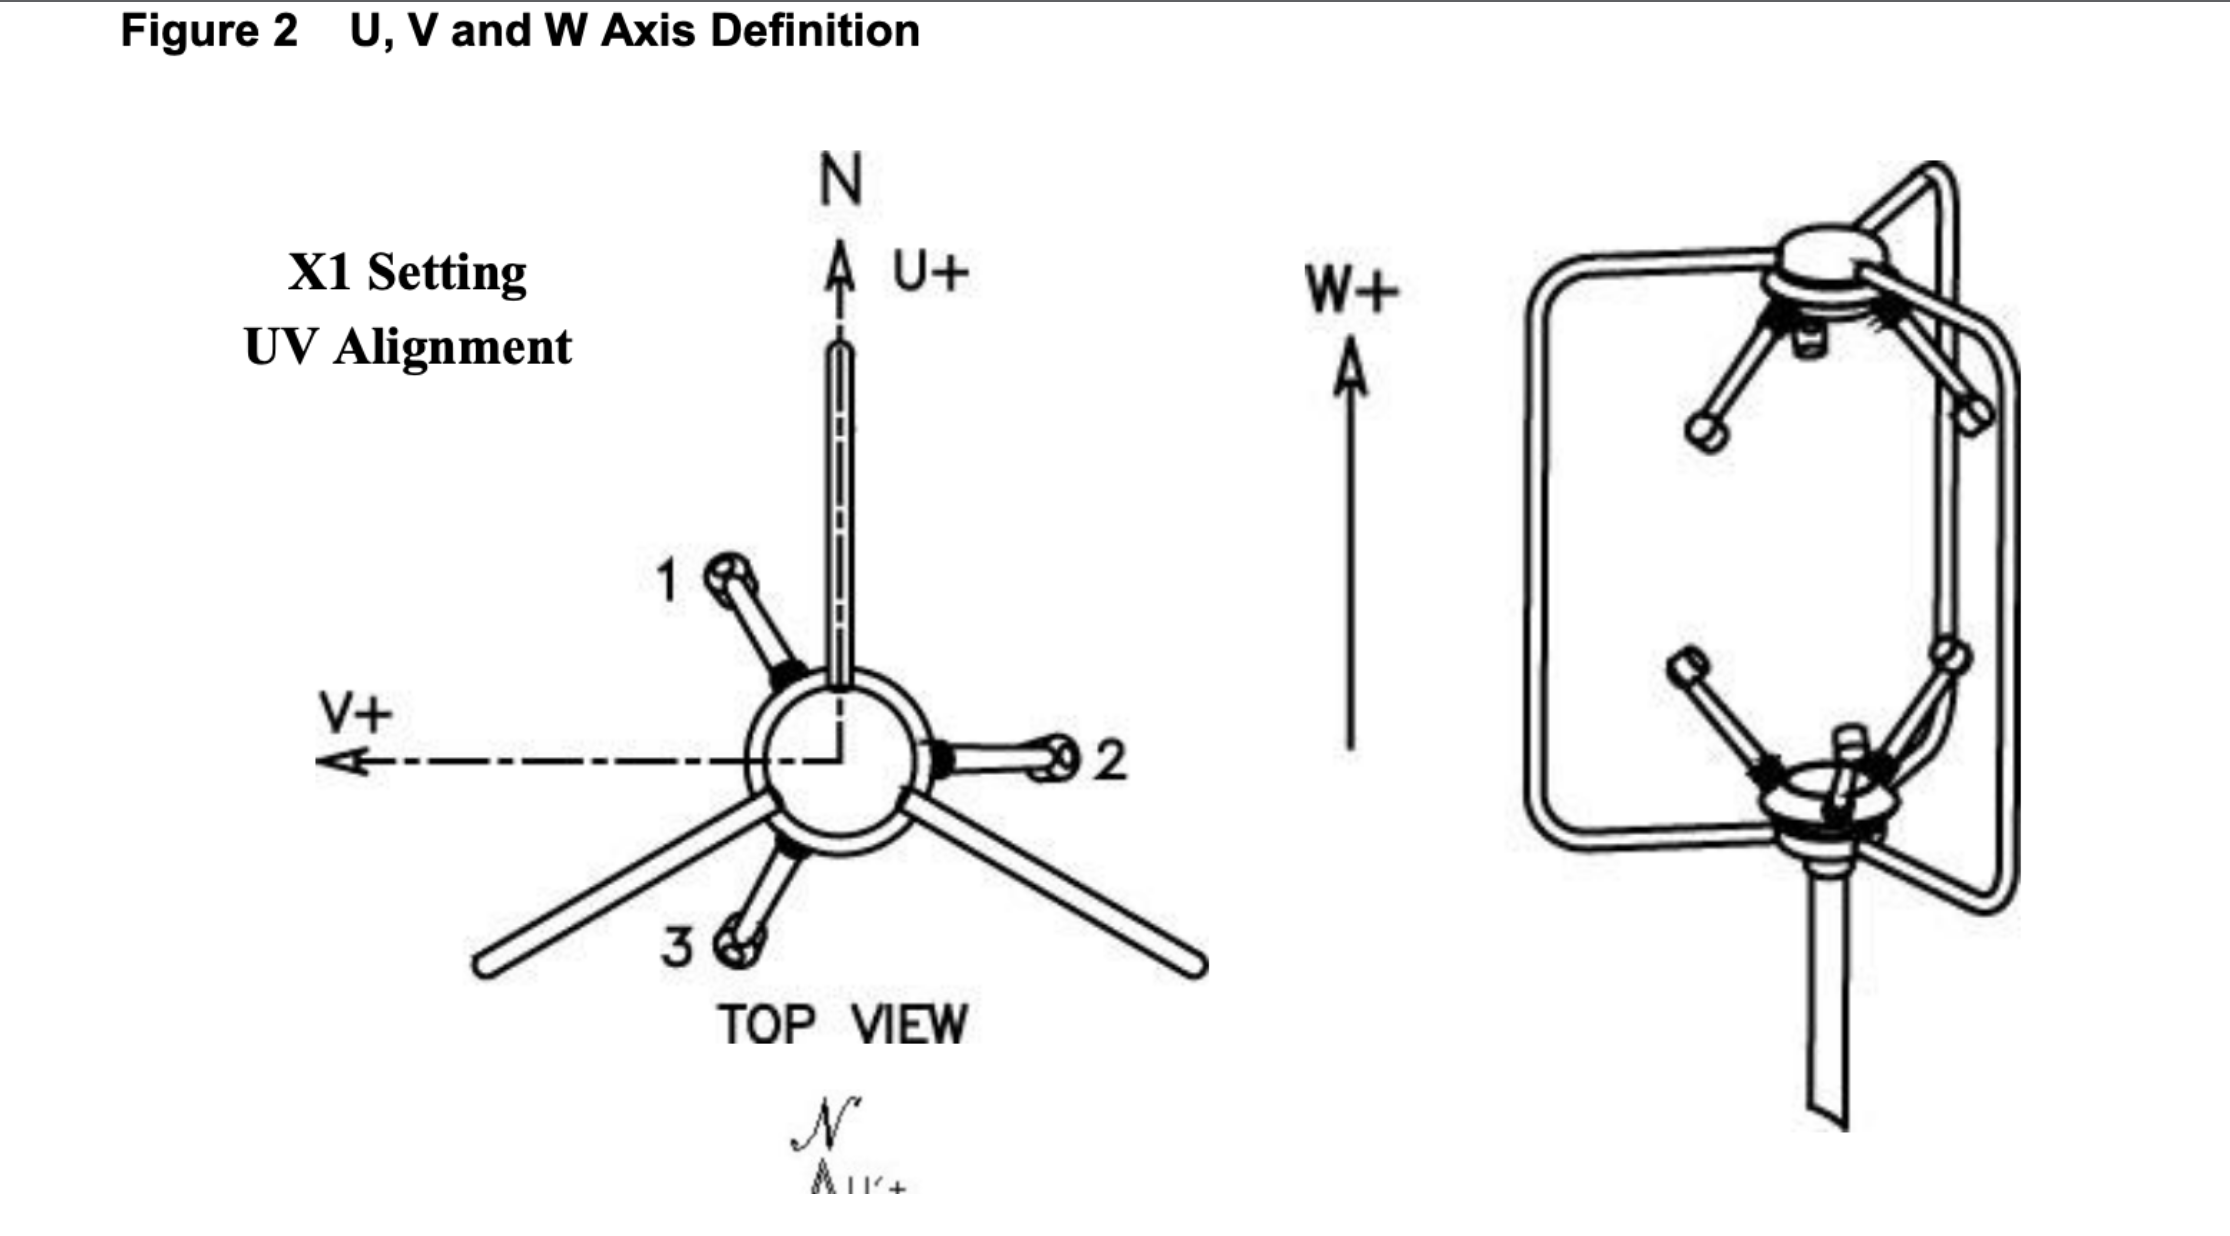

In [3]:
def formato_estacion(df):
    """ receives dataframe with u,v,w, returns ws,wd added """
    DperR = 180/np.pi
    df['ugeo'] = -df.v
    df['vgeo'] = -df.u
    df['ws'] = (df.ugeo**2 + df.vgeo**2 + df.w**2)**0.5
    df['wd'] = 270 + (np.arctan2(df.vgeo,df.ugeo)*DperR)
    df.wd    = df.wd%360.
    return df[['u','v','w','ws','wd']]

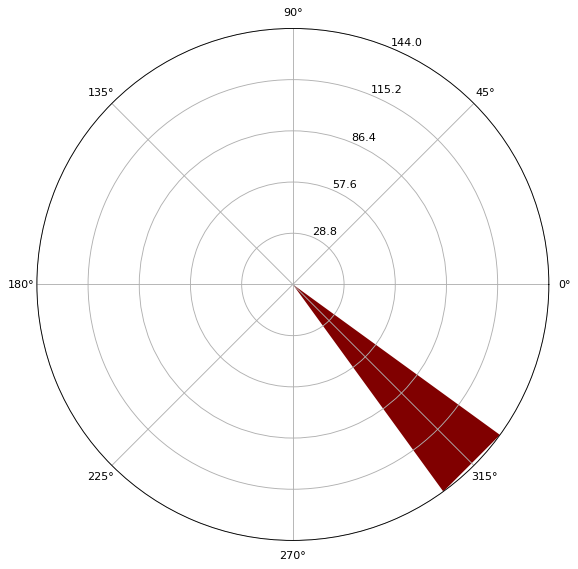

In [27]:
hoy = datetime.datetime.now()
indice = pd.date_range(hoy,periods=144,freq="10Min")
columnas = ["u","v","w"]
df = pd.DataFrame(index=indice,columns=columnas)
df['v'] = 1.
df['u'] = 1.
df['w'] = 0.


df = formato_estacion(df)
df = wd(df)
ax = WindroseAxes.from_ax()
ax.bar (df.wd,df.ws)

In [20]:
datos = formato_estacion(uvw)
datos

,u,v,w,ws,wd
fecha,,,,,
2022-03-12 15:00:23,-0.38,-0.28,0.16,0.498397,323.615648
2022-03-12 15:00:24,-0.41,-0.30,0.10,0.517784,323.806793
2022-03-12 15:00:25,-0.43,-0.26,0.13,0.519038,328.840695
2022-03-12 15:00:26,-0.39,-0.15,0.14,0.440681,338.962489
2022-03-12 15:00:27,-0.32,-0.01,0.14,0.349428,358.210089
...,...,...,...,...,...
2022-03-12 15:41:34,-0.51,-1.50,0.21,1.598186,288.778033
2022-03-12 15:41:35,-0.41,-1.59,0.19,1.652967,284.459395
2022-03-12 15:41:36,-0.35,-1.71,0.24,1.761874,281.567440


In [21]:
datos.to_csv("../data/ws_wd.csv")